In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

data = pd.read_csv('/Users/GDTOP/Desktop/MSiA 423/project/insurance.csv')

In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
len(data)

1338

In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
data=pd.get_dummies(data, columns=['sex', 'smoker','region'],drop_first=True)

In [4]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [5]:
data.corr()['charges'].sort_values()

region_southwest   -0.043210
region_northwest   -0.039905
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64

In [129]:
figs =[]

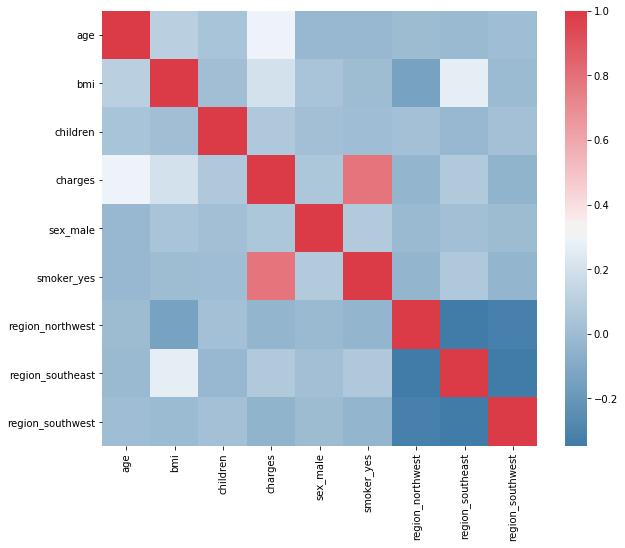

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

A strong correlation is observed only with the fact of smoking the patient. 

In [137]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot(p,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))
plt.savefig("/Users/GDTOP/Desktop")

Loading BokehJS ...

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Count')

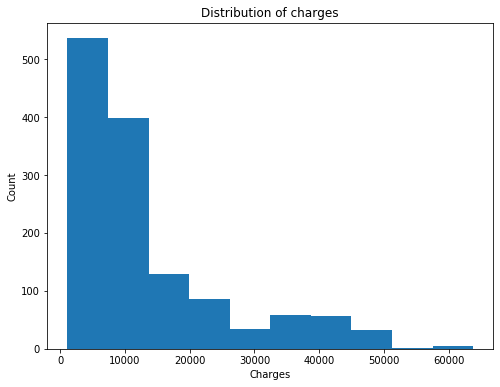

In [107]:
f, ax = plt.subplots(figsize=(10, 8))
ax.hist (data.charges)
ax.title.set_text("Distribution of charges")
ax.set_xlabel("Charges")
ax.set_ylabel("Count")

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

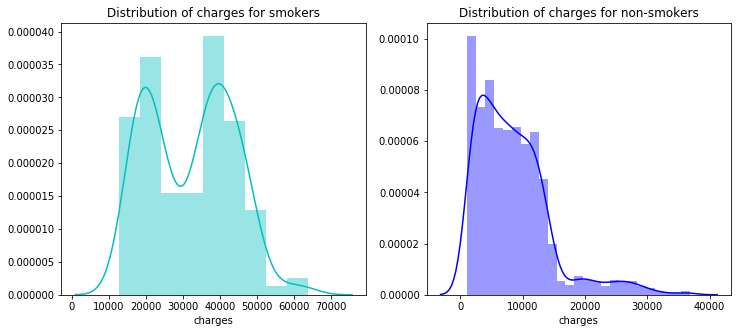

In [7]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker_yes == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker_yes == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

In [113]:
figs.append(f)

In [114]:
 for i, figure in enumerate(figs):
        figure.savefig(os.path.join("/Users/GDTOP/Desktop/", 'figure%d.png' % i))

Smoking patients spend more on treatment. 

### Gender

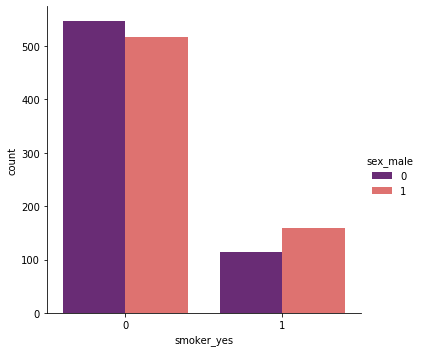

In [13]:
pl = sns.factorplot(x="smoker_yes", kind="count",hue = 'sex_male', palette="magma", data=data)

In [125]:
figs.append(pl)

In [126]:
for i, figure in enumerate(figs):
        figure.savefig(os.path.join("/Users/GDTOP/Desktop/", 'figure%d.png' % i))

More male smokers than female smokers

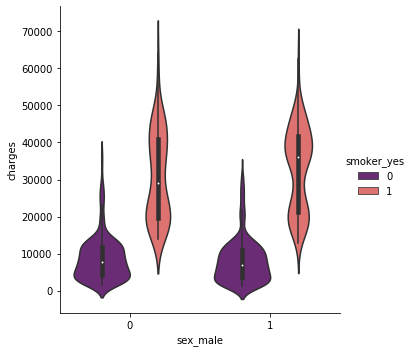

In [10]:
sns.factorplot(x="sex_male", y="charges", hue="smoker_yes",
            kind="violin", data=data, palette = 'magma')

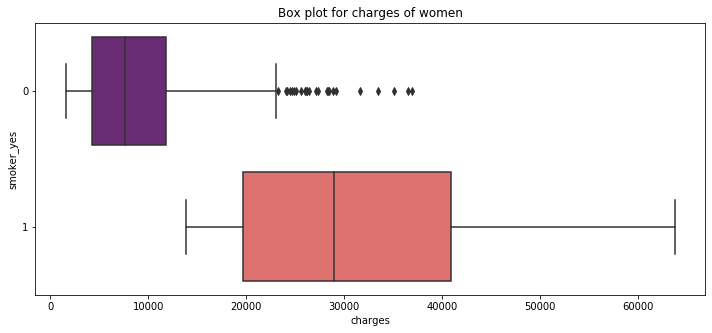

In [127]:
f= plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker_yes", x="charges", data =  data[(data.sex_male == 0)] , orient="h", palette = 'magma')

In [130]:
figs.append(f)

In [131]:
for i, figure in enumerate(figs):
        figure.savefig(os.path.join("/Users/GDTOP/Desktop/", 'figure%d.png' % i))

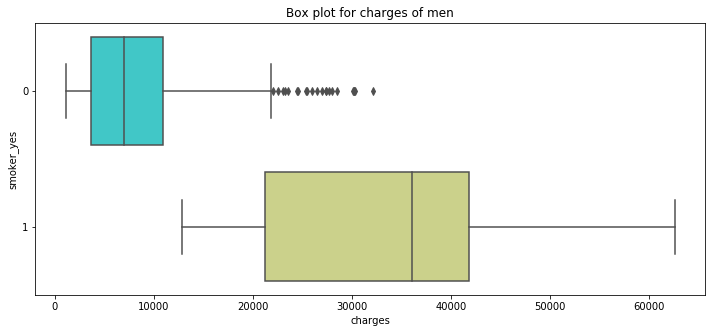

In [12]:
f = plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker_yes", x="charges", data =  data[(data.sex_male == 1)] , orient="h", palette = 'rainbow')


total cost of treatment in men is more than in women

## Age

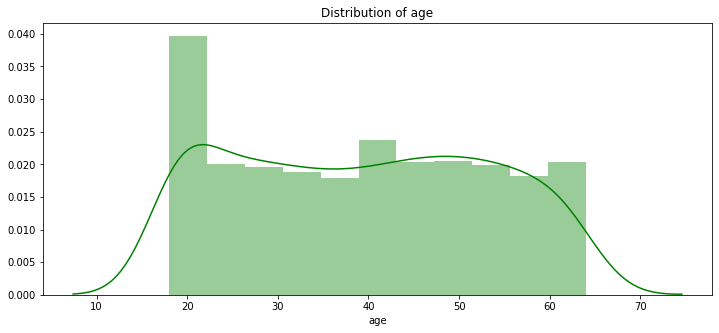

In [13]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1, 'Distribution of charges and age for non-smokers')

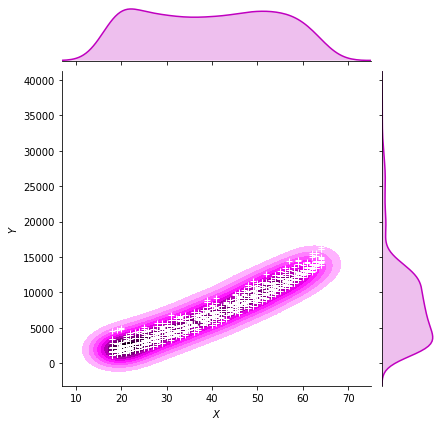

In [8]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker_yes == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1, 'Distribution of charges and age for smokers')

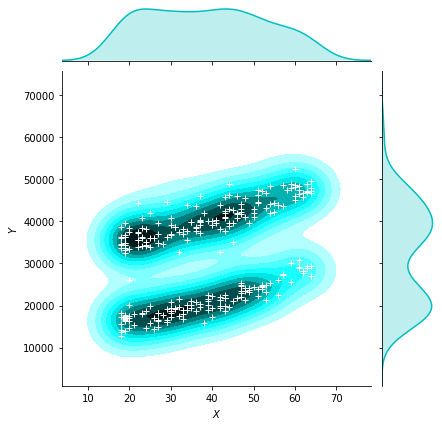

In [9]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker_yes == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1, 'Smokers and non-smokers')

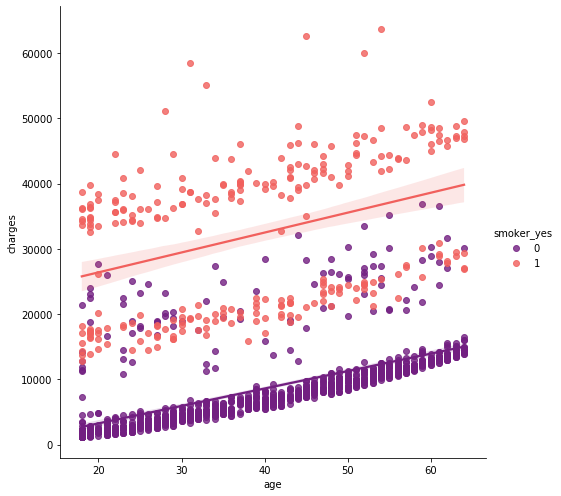

In [14]:
sns.lmplot(x="age", y="charges", hue="smoker_yes", data=data, palette = 'magma', size = 7)
ax.set_title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age. In smoking people, we do not see such dependence.

## bmi

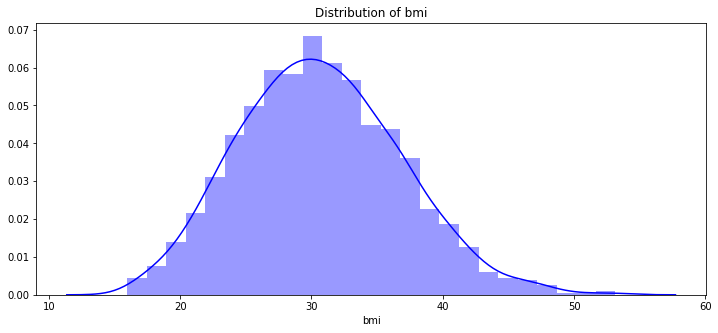

In [15]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'b')

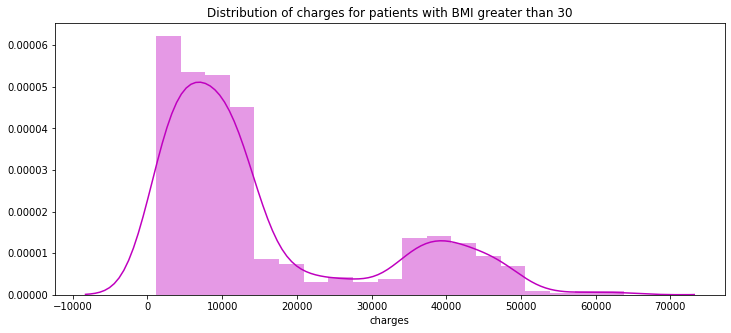

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

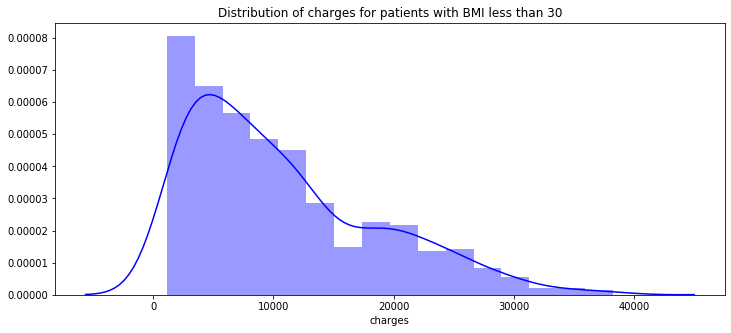

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Patients with BMI above 30 spend more on treatment.

Text(0.5, 1, 'Distribution of bmi and charges')

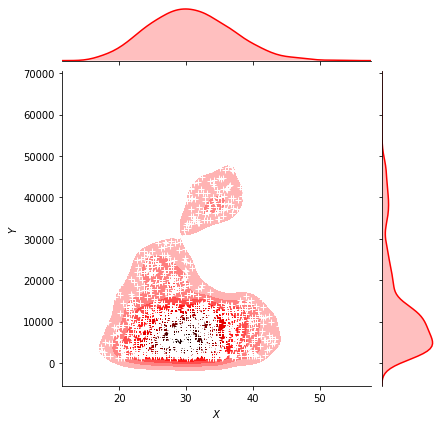

In [22]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

()

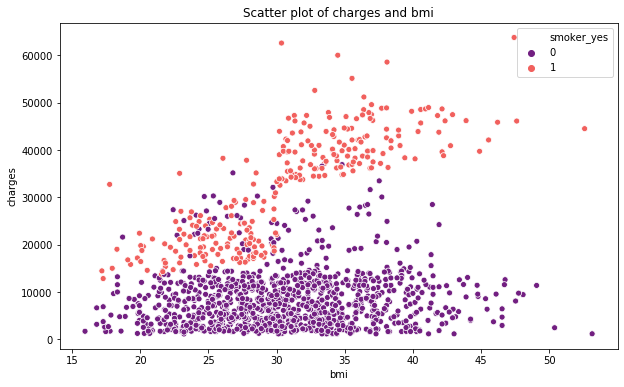

In [19]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker_yes')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker_yes", data=data, palette = 'magma', size = 8) 

## Children

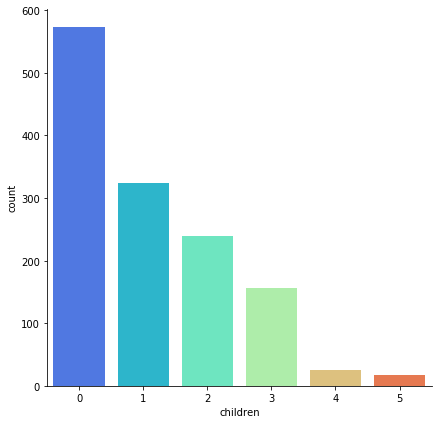

In [18]:
sns.catplot(x="children", kind="count", palette="rainbow", data=data, size = 6)

Text(0.5, 1, 'Smokers and non-smokers who have childrens')

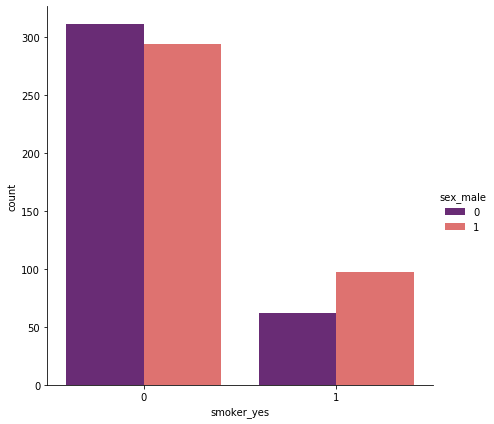

In [20]:
sns.catplot(x="smoker_yes", kind="count", palette="magma",hue = "sex_male",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

Non-smoking parents are much more 

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [8]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 15)


In [39]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7709928565663493


In [10]:
## Random Forest Model
rm = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
rm.fit(x_train,y_train)
train_pred = rm.predict(x_train)
test_pred = rm.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,train_pred),
mean_squared_error(y_test,test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,train_pred),
r2_score(y_test,test_pred)))

MSE train data: 3746403.169, MSE test data: 19568385.032
R2 train data: 0.975, R2 test data: 0.850


In [46]:
type(rm)

sklearn.ensemble.forest.RandomForestRegressor

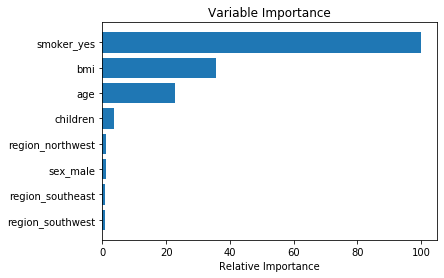

In [66]:
feature_importance = rm.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[:20]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

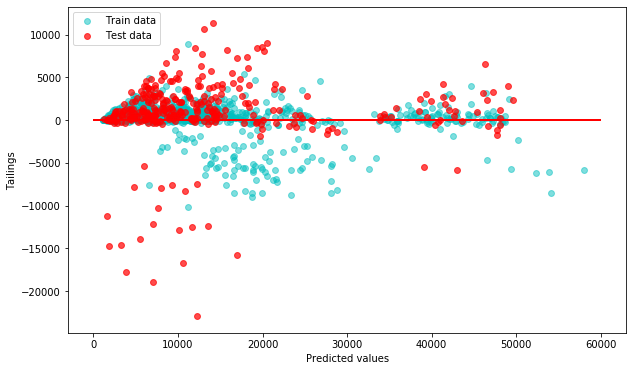

In [78]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'c', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'r', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()